In [8]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score

In [302]:
df = pd.read_csv('train.csv')
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
1,2,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
2,3,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
3,4,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
4,5,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1624,42,Travel_Frequently,Research & Development,19,3,Medical,752,3,Male,...,3,0,7,2,2,2,2,2,3,1
1624,1625,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
1625,1626,25,Travel_Rarely,Sales,9,2,Life Sciences,1439,1,Male,...,3,0,6,2,3,2,2,2,5,1
1626,1627,29,Travel_Rarely,Human Resources,13,3,Human Resources,1844,1,Male,...,3,3,4,3,2,2,2,0,5,1


In [46]:
X_train.shape

(1628, 46)

In [303]:
# Preprocessing X 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()

X.loc[:, "Department"] = le.fit_transform(X.loc[:, "Department"])
X.BusinessTravel = le.fit_transform(X.BusinessTravel)
X.EducationField = le.fit_transform(X.EducationField)
X.Gender = le.fit_transform(X.Gender)
X.JobRole = le.fit_transform(X.JobRole)
X.MaritalStatus = le.fit_transform(X.MaritalStatus)
X.OverTime = le.fit_transform(X.OverTime)
 
X = X.drop(['Id', 'Behaviour'], axis=1)


sc_X = StandardScaler()
X_train = sc_X.fit_transform(X)

# Importing and Preprocessing X_test
Xtest = pd.read_csv("test.csv")

#Xtest = pd.get_dummies(Xtest)
Xtest.loc[:, "Department"] = le.fit_transform(Xtest.loc[:, "Department"])
Xtest.BusinessTravel = le.fit_transform(Xtest.BusinessTravel)
Xtest.EducationField = le.fit_transform(Xtest.EducationField)
Xtest.Gender = le.fit_transform(Xtest.Gender)
Xtest.JobRole = le.fit_transform(Xtest.JobRole)
Xtest.MaritalStatus = le.fit_transform(Xtest.MaritalStatus)
Xtest.OverTime = le.fit_transform(Xtest.OverTime)
 
Xtest = Xtest.drop(["Id", "Behaviour"], axis=1)
X_test = sc_X.transform(Xtest)

# Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size = 0.3)

### Logistic Regression

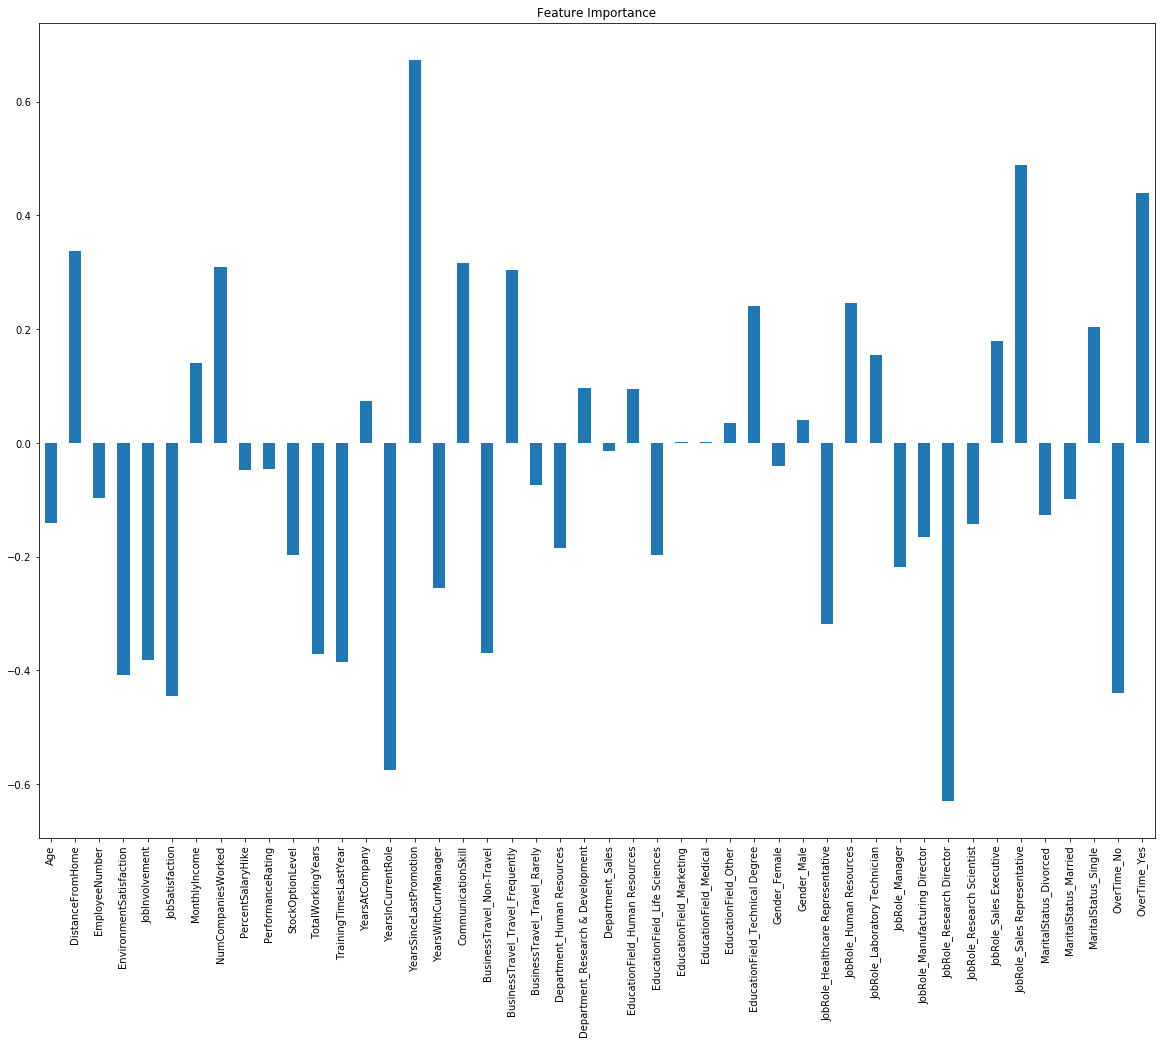

In [132]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.23357214, max_iter=1000)
classifier.fit(X_train, y_train)

# Match coef's of features to columns
feature_dict = dict(zip(X.columns, list(classifier.coef_[0])))
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(20, 15));

y_probs = classifier.predict_proba(X_valid)[:, 1]

In [86]:
grid = {"C": np.logspace(-4,4,20), 
        "max_iter": [100, 1000, 2500, 5000],
        "solver": ['liblinear', 'lbfgs', 'sag', 'saga'],
        "penalty": ['l1', 'l2', 'elasticnet', 'none']
       }# l1 lasso l2 ridge

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=10, verbose=True, n_jobs=-1)
logreg_cv.fit(X_train, y)

Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1054 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 2172 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 3369 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4659 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 5936 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 7072 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 8330 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 9701 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 11290 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 12785 out of 12800 | elapsed: 11.1min remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed: 11.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
               

In [70]:
logreg_cv.best_estimator_

NameError: name 'logreg_cv' is not defined

In [55]:
classifier = LogisticRegression(C=0.23357214,  class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                                   warm_start=False)

classifier.fit(X_train, y_train)
y_probs = classifier.predict_proba(X_valid)[:, 1]

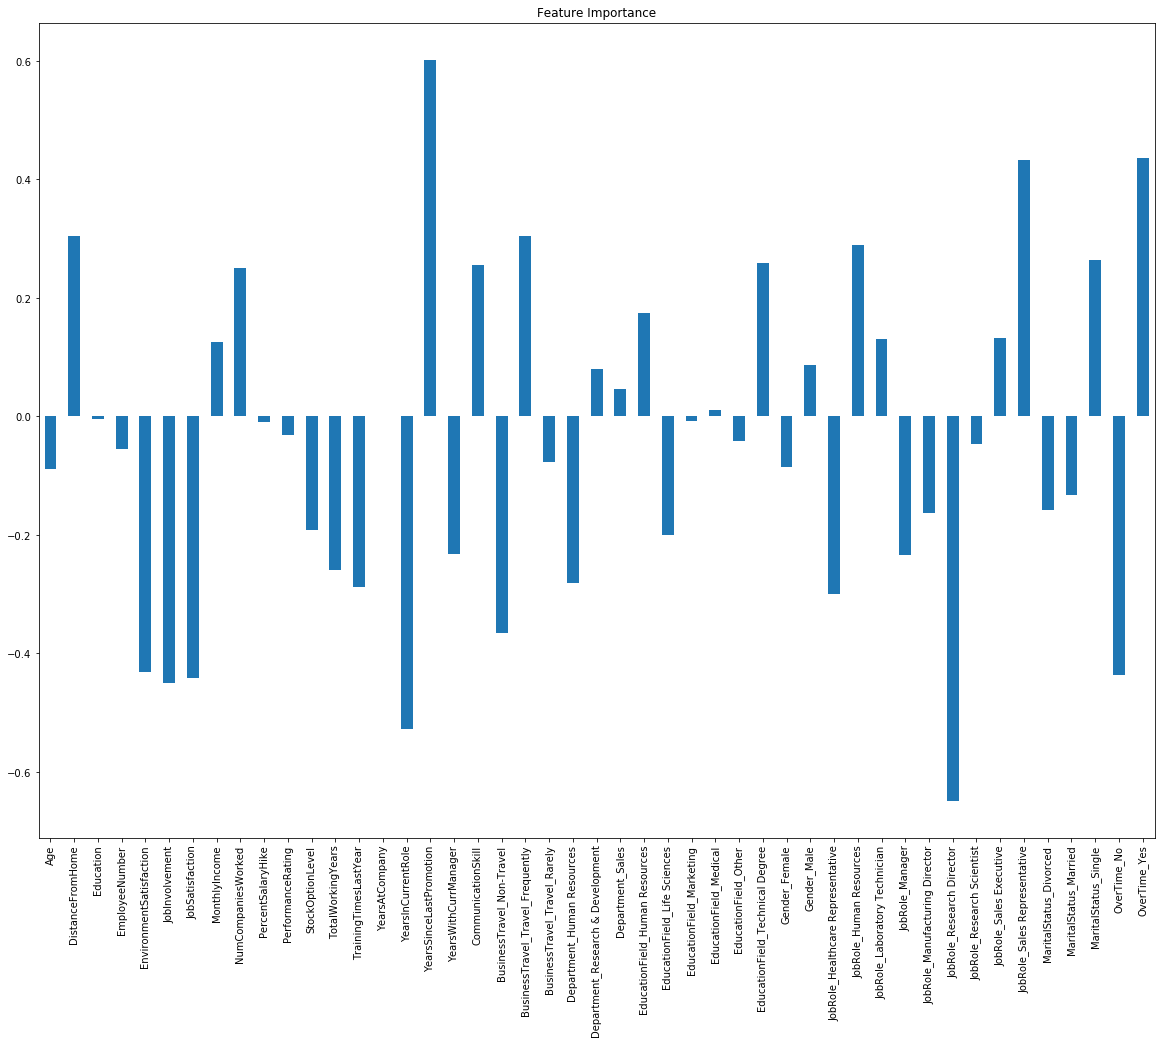

In [53]:
# Match coef's of features to columns
feature_dict = dict(zip(X.columns, list(classifier.coef_[0])))
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(20, 15));

## SVM

In [139]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_valid = kpca.transform(X_valid)
X_test = kpca.transform(X_test)

In [311]:
classifier = SVC(kernel='rbf', probability=True, C=1).fit(X_train, y_train)
y_probs = classifier.predict_proba(X_test)[:, 1]

In [35]:
## Using Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
gs_clf = GridSearchCV(classifier, param_grid, cv = 5, verbose = 2)
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.7s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.7s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   34.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [39]:
# Best parameters after tuning
gs_clf.best_params_
#y_probs = gs_clf.predict_proba(X_test)[:, 1]
#y_probs

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

## SVM linear

In [296]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=10, gamma=3)
clf.fit(X_train, y_train)
y_probs = clf.predict(X_valid)

In [285]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.750, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.785, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.781, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.775, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.785, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.781, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.775, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.750, total=   0.0s
[CV] 

[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.785, total=   1.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.793, total=   1.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.763, total=   1.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.750, total=   1.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.785, total=   0.7s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.785, total=   1.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.793, total=   1.2s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] .

[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.750, total= 1.3min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.789, total= 1.6min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.781, total= 2.4min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.797, total= 4.0min


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 61.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [287]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

## Multiple Linear regression

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.2)
reg = LinearRegression()

reg.fit(X_train, y_train)
y_probs = reg.predict(X_valid)

# Evaluating Classification model

### Train set 

0.9820596487324953


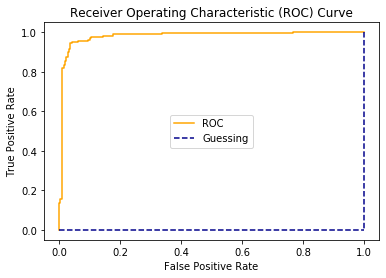

CrossValidated Score:  0.8727223480744608
559   37   23   520
Accuracy:  0.9473222124670764
Precision:  0.933572710951526
Recall: 0.9576427255985267
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       596
           1       0.93      0.96      0.95       543

    accuracy                           0.95      1139
   macro avg       0.95      0.95      0.95      1139
weighted avg       0.95      0.95      0.95      1139



In [242]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import cross_val_score

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_probs.flatten())

print(roc_auc_score(y_train, y_probs))

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 0], color='darkblue', linestyle='--', label='Guessing')
    plt.plot([1, 1], [1, 0], color='darkblue', linestyle='--')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

print("CrossValidated Score: ", cross_val_score(classifier, X_train, y_train, cv=8).mean())

# Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = (y_probs.flatten() > .5)
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print(tn, " ", fp, " ", fn, " ", tp)
print("Accuracy: ", (tp+tn)/(tp+fp+tn+fn))
print("Precision: ", tp/(tp+fp))
print("Recall:", tp/(tp+fn))
print(classification_report(y_train, y_pred))

### Validation set

0.9464622641509433


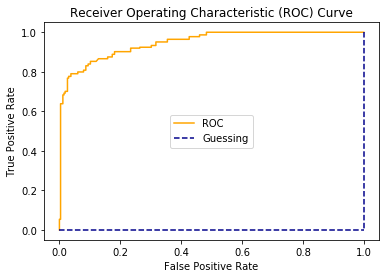

CrossValidated Score:  0.8920577661774844
233   32   33   191
Accuracy:  0.8670756646216768
Precision:  0.8565022421524664
Recall: 0.8526785714285714
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       265
           1       0.86      0.85      0.85       224

    accuracy                           0.87       489
   macro avg       0.87      0.87      0.87       489
weighted avg       0.87      0.87      0.87       489



In [310]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_probs.flatten())

print(roc_auc_score(y_valid, y_probs))

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 0], color='darkblue', linestyle='--', label='Guessing')
    plt.plot([1, 1], [1, 0], color='darkblue', linestyle='--')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

print("CrossValidated Score: ", cross_val_score(classifier, X_train, y_train, cv=8).mean())

# Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = (y_probs.flatten() > .5)
tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()
print(tn, " ", fp, " ", fn, " ", tp)
print("Accuracy: ", (tp+tn)/(tp+fp+tn+fn))
print("Precision: ", tp/(tp+fp))
print("Recall:", tp/(tp+fn))
print(classification_report(y_valid, y_pred))

# BESTEST rank 40
## SVC(kernel='rbf', probability=True, C=1).fit(X_train, y_train) on validation set

auc_score : 0.945894270763451

CrossValidated Score:  0.8938121737417513

tn, fp, fn, tp = 228, 29, 20, 212

Accuracy:  0.8997955010224948

Precision:  0.8796680497925311

Recall: 0.9137931034482759

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       257
           
           1       0.88      0.91      0.90       232

    accuracy                           0.90       489
   
   macro avg       0.90      0.90      0.90       489

weighted avg       0.90      0.90      0.90       489

### Logistic best Score
0.8851916494775257


682   161   155   630
Accuracy:  0.8058968058968059
Precision:  0.7964601769911505
Recall: 0.802547770700637
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       843
           1       0.80      0.80      0.80       785

    accuracy                           0.81      1628
   macro avg       0.81      0.81      0.81      1628
weighted avg       0.81      0.81      0.81      1628

### SVM Best SCORE using get_dummies, 
auc_roc_score: 0.9939554669024034

* tn, fp, fn, tp = 816   27   15   770
* Accuracy:  0.9742014742014742
* Precision:  0.9661229611041405
* Recall: 0.9808917197452229

              precision    recall  f1-score   support

           
           0       0.98      0.97      0.97       843
           
           1       0.97      0.98      0.97       785

    accuracy                           0.97      1628
   
   macro avg       0.97      0.97      0.97      1628

weighted avg       0.97      0.97      0.97      1628

#### SVM best SCORE:  SVC(kernel='rbf', random_state=0, probability=True)
roc_auc_score :0.9928825622775801

CrossValidated Score:  0.9133784701999612
* tn, fp, fn, tp = 802,  41,  25,  760
* Accuracy:  0.9594594594594594
* Precision:  0.9488139825218477
* Recall : 0.9681528662420382

## Results into csv

In [139]:
submission =1

In [312]:
# Turning results into csv file
#print("Submission no. : ", submission)
data = {"Id": pd.read_csv("test.csv")["Id"],
        "Attrition": y_probs.flatten()}
predictions = pd.DataFrame(data, columns = ["Id", "Attrition"]).to_csv(f"Submissions/Submission.csv", index=False)
#submission+=1

With Employeenumber included, labelEncoding, standardScaling in SVM Kernel: - 85% score

In [123]:
grid = {"n_estimators": [10, 100, 200, 500, 1000],
        "max_depth": [None, 5, 10, 20, 30], 
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid,
                            cv=5,
                            verbose=2)

X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.4s
[CV] max_depth=None, max_f

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_f

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.1s
[CV] max_depth=None, max_f

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_sam

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   1.9s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   2.3s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   2.3s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed: 30.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [124]:
rs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [70]:
# Using ANN
# Importing the Keras libraries and packages
import keras 
from keras.models import Sequential # Initialise neural network
from keras.layers import Dense # Used to create layers in ANN

# Initialising the ANN
classifier = Sequential() # Main structure

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu', input_dim = 46)) # Adding sections/parts to the main structure

# Adding the second hidden layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the sixth hidden layer
classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y, batch_size = 10, epochs = 100)

Epoch 1/100
1628/1628 [==============================] - 1s 478us/step - loss: 0.5976 - accuracy: 0.6566
Epoch 2/100
1628/1628 [==============================] - 0s 216us/step - loss: 0.3822 - accuracy: 0.8421
Epoch 3/100
1628/1628 [==============================] - 0s 216us/step - loss: 0.3039 - accuracy: 0.8845
Epoch 4/100
1628/1628 [==============================] - 0s 219us/step - loss: 0.2396 - accuracy: 0.9072
Epoch 5/100
1628/1628 [==============================] - 0s 224us/step - loss: 0.2182 - accuracy: 0.9171
Epoch 6/100
1628/1628 [==============================] - 0s 225us/step - loss: 0.1857 - accuracy: 0.9404
Epoch 7/100
1628/1628 [==============================] - 0s 223us/step - loss: 0.1274 - accuracy: 0.9552
Epoch 8/100
1628/1628 [==============================] - 0s 221us/step - loss: 0.1247 - accuracy: 0.9588
Epoch 9/100
1628/1628 [==============================] - 0s 223us/step - loss: 0.1138 - accuracy: 0.9638
Epoch 10/100
1628/1628 [==============================]

In [71]:
y_probs = classifier.predict(X_train)
y_probs

array([[2.6824878e-36],
       [2.2736175e-09],
       [1.0000000e+00],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [222]:
X_train.shape

(1628, 26)

## Using Different approach

In [116]:
df.BusinessTravel.cat.codes.value_counts()

2    1105
1     403
0     120
dtype: int64

In [125]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [126]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes

In [129]:
y = df.Attrition

In [132]:
df.drop(["Id", "Attrition", "Behaviour"], axis=1, inplace=True)

In [138]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

In [158]:
Xtest = pd.read_csv("test.csv")
for label, content in Xtest.items():
    if pd.api.types.is_string_dtype(content):
        Xtest[label] = content.astype("category").cat.as_ordered()
    if not pd.api.types.is_numeric_dtype(content):
        Xtest[label] = pd.Categorical(content).codes

Xtest = Xtest.drop(["Id", "Behaviour"], axis=1)
X_test = preprocessing.scale(Xtest)

In [161]:
X_train, X_valid, y_train, y_valid = train_test_split(df_scaled, y, test_size=.3)
classifier = SVC(kernel='rbf', probability=True, C=1.2).fit(X_train, y_train)
y_probs = classifier.predict_proba(X_valid)[:, 1]
y_probs

array([3.83883251e-02, 8.62281587e-01, 1.36979106e-03, 9.40200227e-01,
       9.40178403e-01, 7.77286715e-01, 4.60789022e-03, 2.00257808e-02,
       7.48526814e-01, 9.40145034e-01, 6.68950582e-01, 7.06908768e-01,
       9.51698170e-01, 4.71964468e-01, 2.16785143e-01, 1.30877181e-03,
       9.40178403e-01, 9.40170875e-01, 9.40162847e-01, 9.40170303e-01,
       9.40173127e-01, 5.74786671e-02, 9.40162905e-01, 1.72456324e-02,
       7.88945920e-01, 1.14505713e-02, 9.84490054e-01, 9.65535987e-01,
       1.42652076e-01, 9.12184120e-01, 6.46384148e-03, 7.12885323e-02,
       1.23130301e-01, 4.83478389e-01, 7.41911805e-02, 4.59522501e-02,
       1.53369912e-01, 1.32779062e-03, 3.73888041e-01, 1.27270915e-02,
       9.40104920e-01, 2.05880196e-01, 2.42421788e-03, 9.40201824e-01,
       9.40143934e-01, 4.86408679e-02, 2.87999159e-02, 1.33534274e-01,
       7.90346719e-01, 4.62292161e-04, 1.68901970e-03, 1.29810425e-03,
       6.43624911e-02, 9.40184423e-01, 9.40215195e-01, 7.97677317e-01,
      

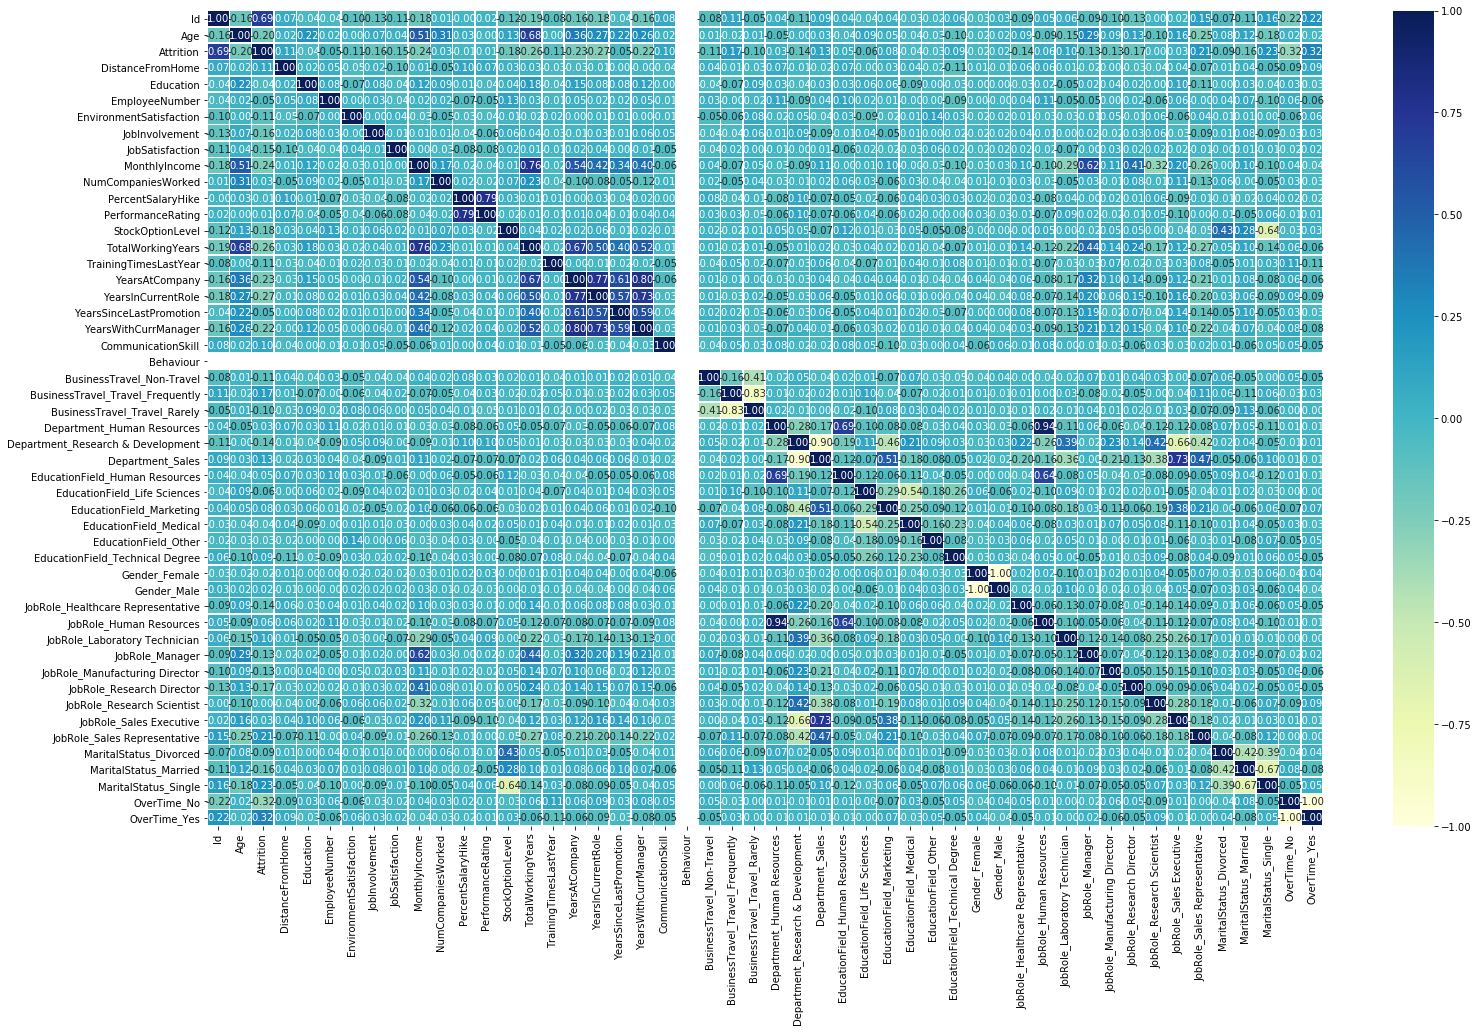

In [187]:
# Let's make our correlation matrix a little prettier
import seaborn as sns
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(25, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");